# Aiffel Mini Project - Explorestage 03

# Machine Learning Mini Project

## Machine Learning Hyperparameter tuning

# 3-13. Project : This is your playground! Kaggle Leaderboard

### Hyperparameter optimization

자, 이제 여러분이 직접 다양한 하이퍼 파라미터를 튜닝하며 최적의 조합을 찾아볼 차례입니다.

여기서 잠깐, 물론 캐글에서의 성적 또는 모델의 성능을 최대화 하기 위한 방법에는 하이퍼 파라미터 튜닝만 있는 것은 절대 아닙니다.
앞선 과정에서 배웠거나 앞으로 배울 내용에서도 다루듯 모델의 성능을 최적화하는 방법은 매우 많고 지금도 끊임없이 연구되고 있습니다.

예를 들면 가장 기본적으로는 데이터를 깊게 탐색하는 EDA 과정을 통해 불필요한 피처를 골라내거나 적절하게 피처를 수정하는 등의 피처 엔지니어링을 진행함으로써 데이터를 정제하는 것이 매우 중요합니다. 데이터가 무엇이냐에 따라, 그리고 그 데이터를 어떻게 정제하느냐에 따라 모델의 파라미터를 튜닝하는 것만으로는 절대 얻을 수 없는 성능 향상이 이루어질 수 있습니다.

오늘은 이렇게 다양한 방법론 중 하이퍼 파라미터 튜닝에 집중해서 모델의 성능을 최대한 끌어올려보지만, 튜닝은 최적화 방법 중 하나일 뿐이라는 것을 잊지 마세요!

### Check library version(라이브러리 버전을 확인해 봅니다)
----
사용할 라이브러리 버전을 둘러봅시다.

In [1]:
import xgboost
import lightgbm
import missingno
import sklearn

print(xgboost.__version__)
print(lightgbm.__version__)
print(missingno.__version__)
print(sklearn.__version__)

1.7.1
3.3.3
0.5.1
1.0.2


#### ✓ 튜닝해볼 수 있는 모델 클래스 인자
----
대표적으로 자주 튜닝하는 lightgbm 라이브러리의 인자는 다음과 같습니다.

- `max_depth` : 의사 결정 나무의 깊이, 정수 사용
- `learning_rate` : 한 스텝에 이동하는 양을 결정하는 파라미터, 보통 0.0001~0.1 사이의 실수 사용
- `n_estimators` : 사용하는 개별 모델의 개수, 보통 50~100 이상의 정수 사용
- `num_leaves` : 하나의 LightGBM 트리가 가질 수 있는 최대 잎의 수
- `boosting_type` : 부스팅 방식, gbdt, rf 등의 문자열 입력

\
위에서 저는 n_estimators와 max_depth 에 대해서만 아주 간단하게 실험했지만, 훨씬 더 다양하게 실험을 하며 최적의 조합을 찾아볼 수 있습니다.
실제로 lightgbm에 넣을 수 있는 인자는 아래 자료들에서 설명하는 것처럼 매우 다양합니다.

- [lightGBM / XGBoost 파라미터 설명](http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/)
- [Chapter 4. 분류 - LightGBM](https://injo.tistory.com/48)
위의 자료 외에도 lightgbm, xgboost 하이퍼 파라미터 튜닝 키워드로 검색해보면 다양한 하이퍼 파라미터의 종류를 확인할 수 있습니다.

실험 과정에서는 물론 위에서 만들었던 my_GridSearch(), save_submission() 등의 함수를 사용해도 되고, 혹은 여러분이 원하는 새로운 함수를 만들어서 사용해도 됩니다!


#### ✓ 시도해볼 수 있는 방법
----
여러분이 시도해볼 수 있는 방법은 다음과 같은 것들이 있습니다.

- 기존에 있는 데이터의 피처를 모델을 보다 잘 표현할 수 있는 형태로 처리하기 (피처 엔지니어링)
- LGBMRegressor, XGBRegressor, RandomForestRegressor 세 가지 이상의 다양한 모델에 대해 하이퍼 파라미터 튜닝하기
- 다양한 하이퍼 파라미터에 대해 그리드 탐색을 시도해서 최적의 조합을 찾아보기
- Baseline 커널에서 활용했던 블렌딩 방법 활용하기

물론 이 외에도 좋은 아이디어가 있다면 당연히 시도해보는 것도 좋습니다. 자유롭게 여러 가지 방법을 활용해서 점수를 끌어올려 보세요!
참고로, 진행하면서 도움이 될 수 있는 가장 좋은 자료는 이미 대회를 진행한 사람들이 올려둔 커널입니다.

- https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/notebooks

아주 다양하게 데이터를 탐색해 본 커널도 있고, 상위권을 달성한 커널은 오늘 다루지 않은 스태킹 앙상블(stacking ensemble) 등의 기법을 활용한 커널을 활용하기도 합니다. 한 번씩 구경해보고 다른 사람들은 어떤 전략으로 성능을 끌어올렸는지 공부해보는 것도 매우 좋을 겁니다!

여러 가지 실험을 해보고 결과 csv는 캐글에, 사용한 노트북은 깃허브(GitHub)를 통해 이곳에 제출해 주세요. 제출한 노트북에는 본인의 캐글 Submission 스코어를 기재해 주시기 바랍니다.

그럼, 시작해보죠! 화이팅!!! 💪🏼

### 프로젝트 루브릭
---
- 데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 캐글 submission까지 전과정이 성공적으로 진행되었는가?
- 제출된 노트북이 캐글 커널로 사용될 수 있을 만큼 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었는가?
- 다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해 캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻었는가?

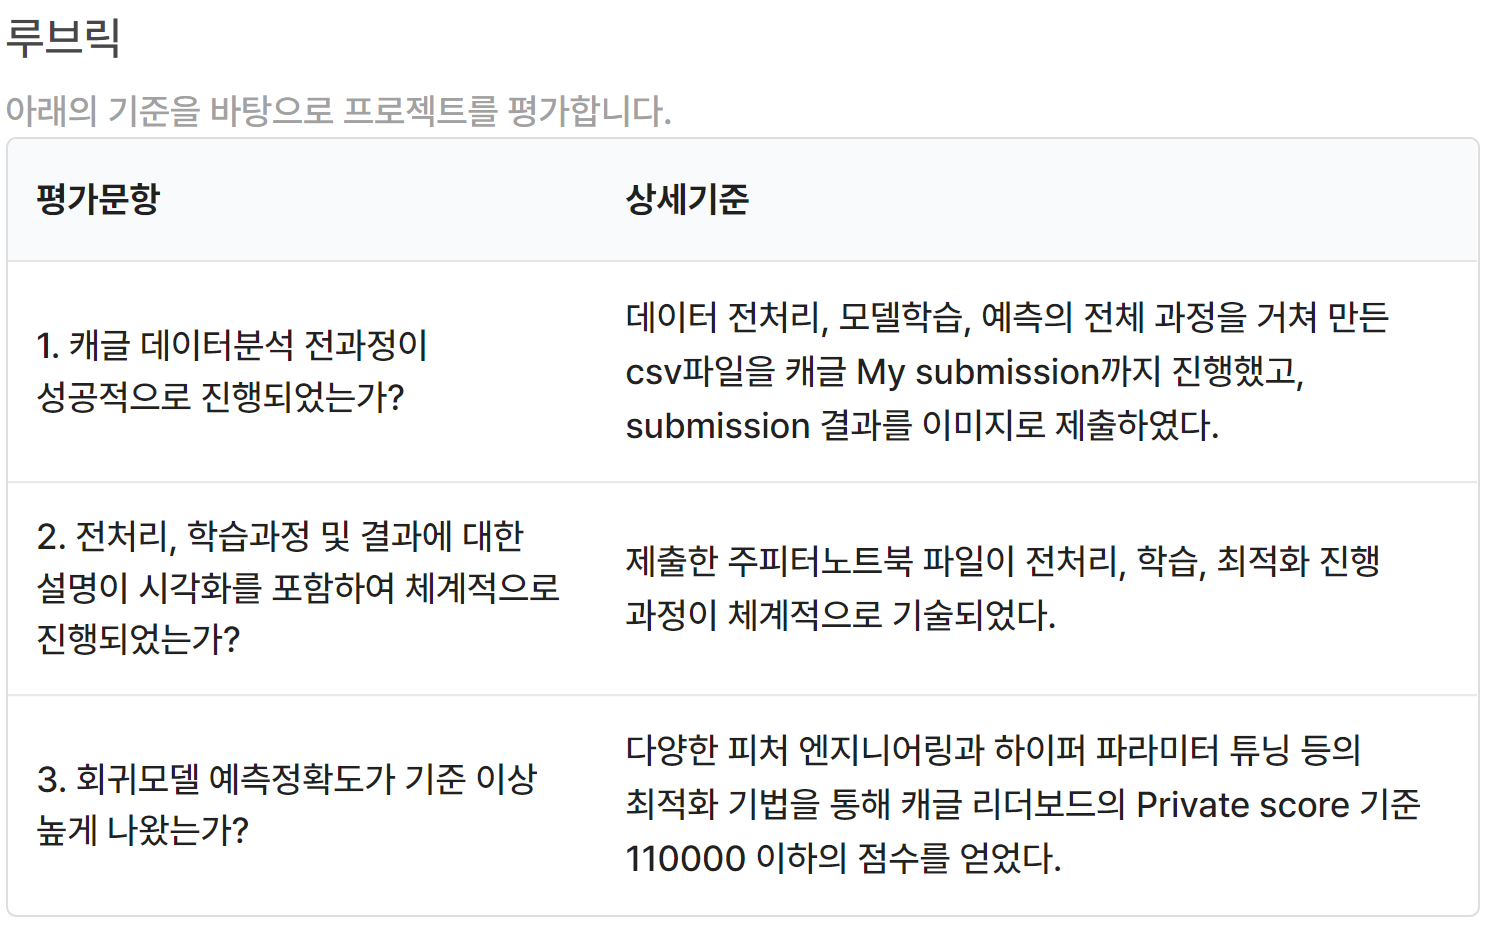

https://www.kaggle.com/code/chocozzz/house-price-prediction-eda-updated-2019-03-12

## 1. Load data and modules(데이터 및 모듈 불러오기)

In [2]:
# module
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# 데이터 불러오기
train_data_path = '.\\data\\train.csv'
test_data_data_path = '.\\data\\test.csv'

data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_data_path)

print(f'train data dim: {data.shape}')
print(f'test data dim: {test_data.shape}')

train data dim: (15035, 21)
test data dim: (6468, 20)


## 2. Exploratory data analysis(데이터 탐색)

### File descriptions

- train.csv - 예측 모델을 만들기 위해 사용하는 학습 데이터입니다. 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있습니다.
- test.csv - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터 입니다.
- sample_submission.csv - 제출시 사용할 수 있는 예시 submission.csv 파일입니다.


### Data fields
- ID : 집을 구분하는 번호
- date : 집을 구매한 날짜
- price : 집의 가격(Target variable)
- bedrooms : 침실의 수
- bathrooms : 화장실의 수
- sqft_living : 주거 공간의 평방 피트(면적)
- sqft_lot : 부지의 평방 피트(면적)
- floors : 집의 층 수
- waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
- view : 집이 얼마나 좋아 보이는지의 정도
- condition : 집의 전반적인 상태
- grade : King County grading 시스템 기준으로 매긴 집의 등급
- sqft_above : 지하실을 제외한 평방 피트(면적)
- sqft_basement : 지하실의 평방 피트(면적)
- yr_built : 지어진 년도
- yr_renovated : 집을 재건축한 년도
- zipcode : 우편번호
- lat : 위도
- long : 경도
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
- sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

[출처](https://www.kaggle.com/competitions/2019-2nd-ml-month-with-kakr/data)

- Check the shape of the DataFrame.(데이터프레임의 형태를 확인합니다.)

In [4]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [5]:
test_data.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  15035  20141209T000000         3       2.25         2570      7242     2.0   
1  15036  20141209T000000         4       3.00         1960      5000     1.0   
2  15037  20140512T000000         4       4.50         5420    101930     1.0   
3  15038  20150415T000000         3       1.00         1780      7470     1.0   
4  15039  20150312T000000         3       2.50         1890      6560     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        2170            400      1951   
1           0     0          5      7        1050            910      1965   
2           0     0          3     11        3890           1530      2001   
3           0     0          3      7        1050            730      1960   
4           0     0          3      7        1890              0      2003   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0          1991    98125  47.7210 -122.319           1690        7639  
1             0    98136  47.5208 -122.393           1360        5000  
2             0    98053  47.6561 -122.005           4760      101930  
3             0    98146  47.5123 -122.337           1780        8113  
4             0    98038  47.3684 -122.031           2390        7570

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [7]:
#Check for missing values.(결측치 확인)
print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [8]:
print(test_data.isnull().sum())

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


### 2-1 Exploring the data through visualization.(시각화를 통한 데이터 탐색)
---
- 이부분은 캐글에서 참고했습니다. 
- [Reference](https://www.kaggle.com/code/chocozzz/house-price-prediction-eda-updated-2019-03-12/notebook)

- 먼저 타겟 데이터인 price에 대해 확인해봅니다. 

C:\Users\aeoli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

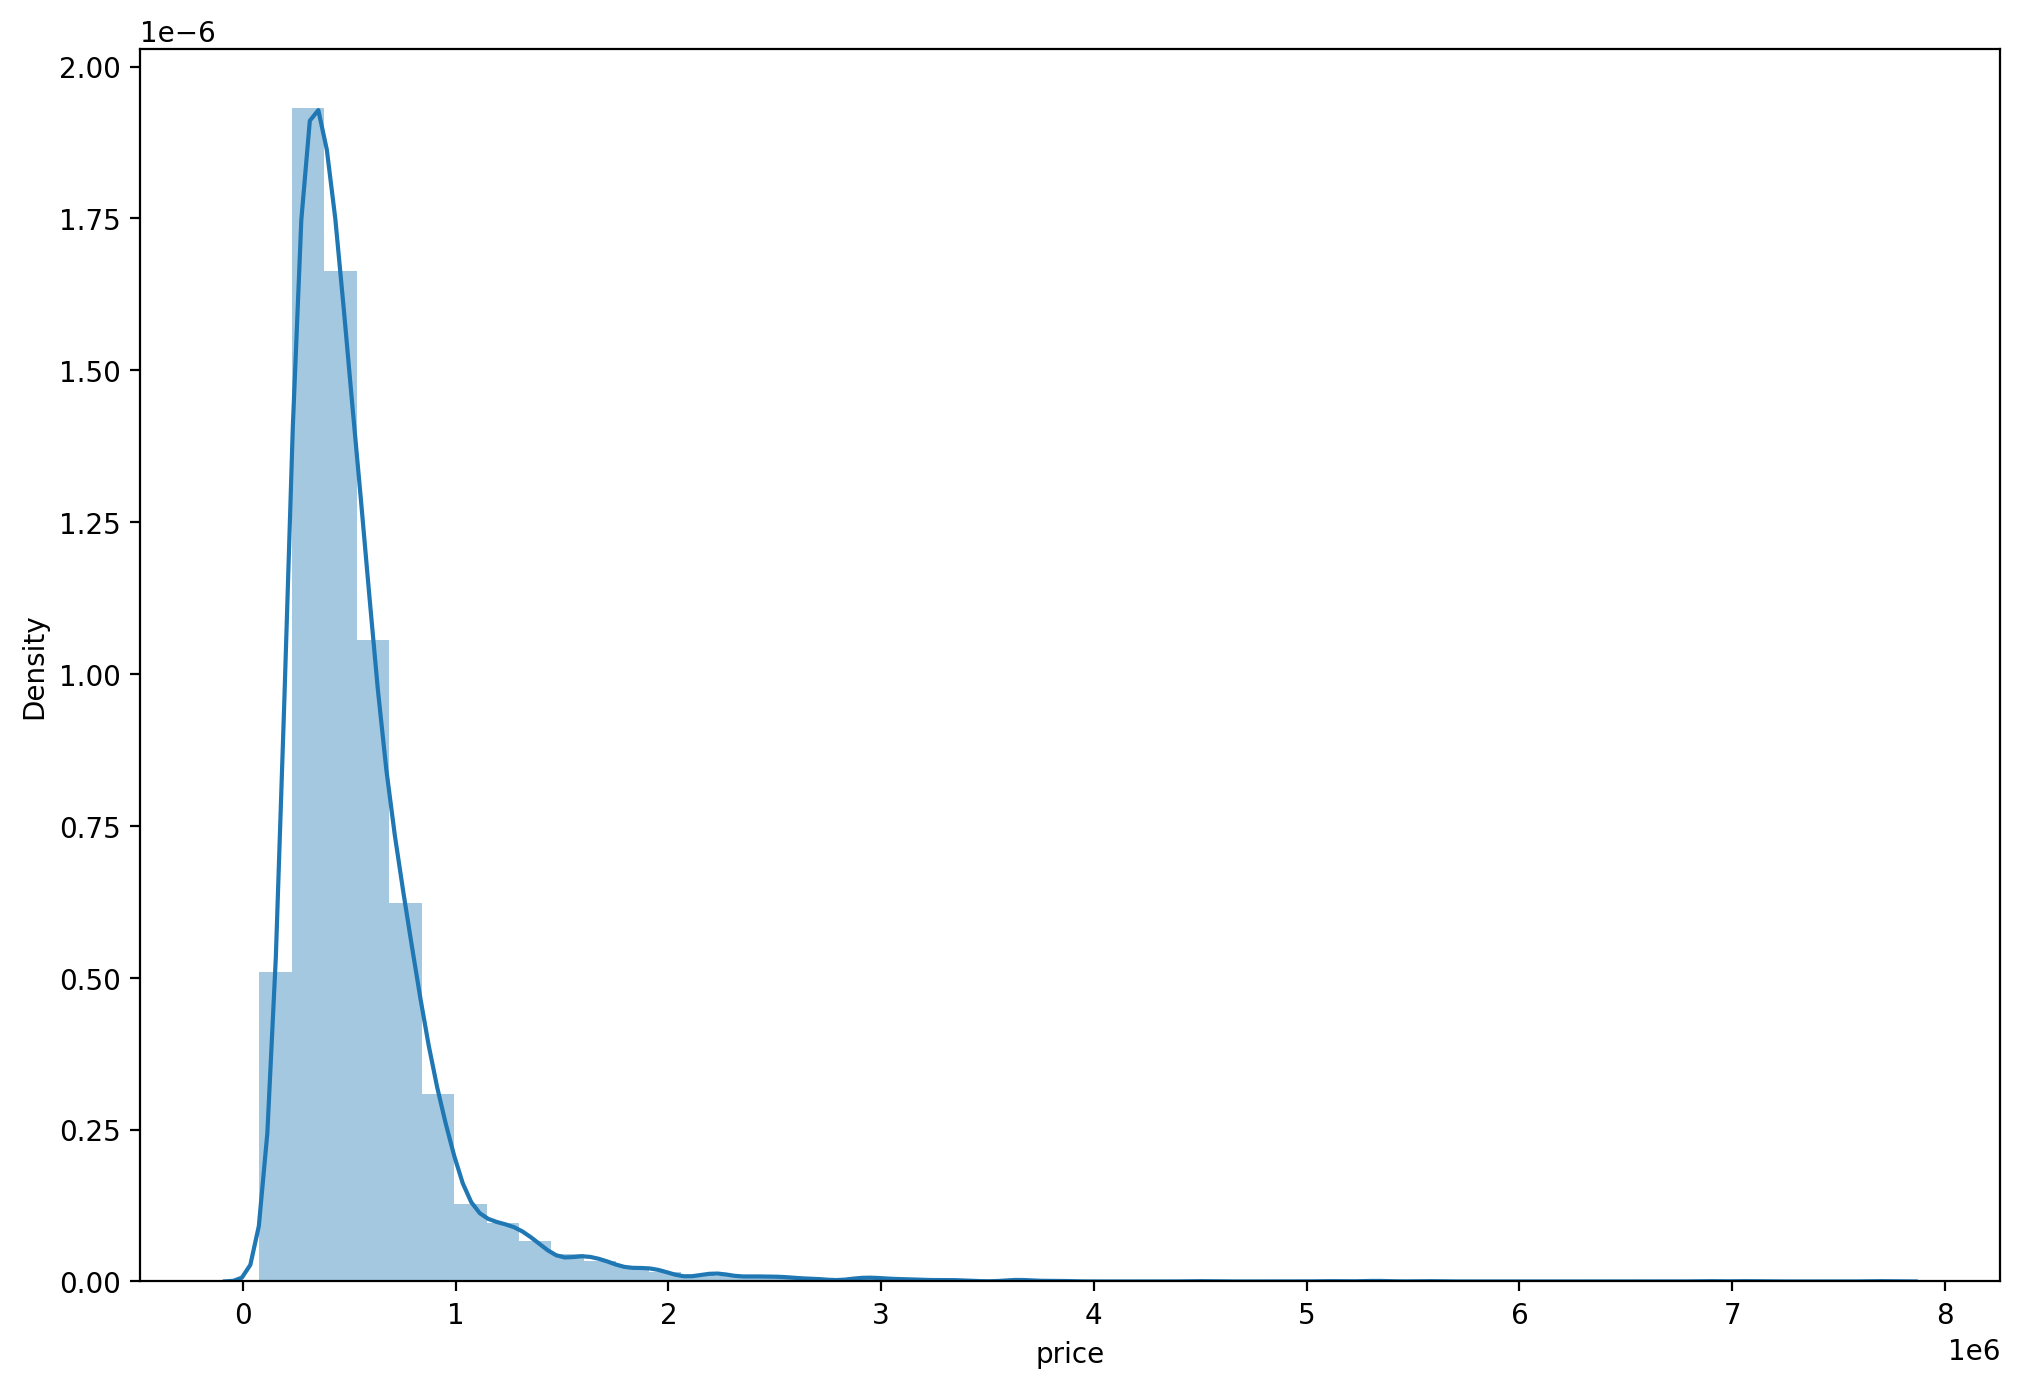

In [9]:
f, ax = plt.subplots(figsize = (12, 8))
sns.distplot(data['price'])

In [10]:
data['price'].describe()

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

- target data인 price의 표준편차가 상당히 큽니다. 좀더 나은 결과를 위해 정규화가 필요해 보입니다. 

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view' 'sqft_basement' 'waterfront'
 'yr_renovated' 'yr_built' 'sqft_lot' 'long' 'sqft_lot15' 'id']


<AxesSubplot:>

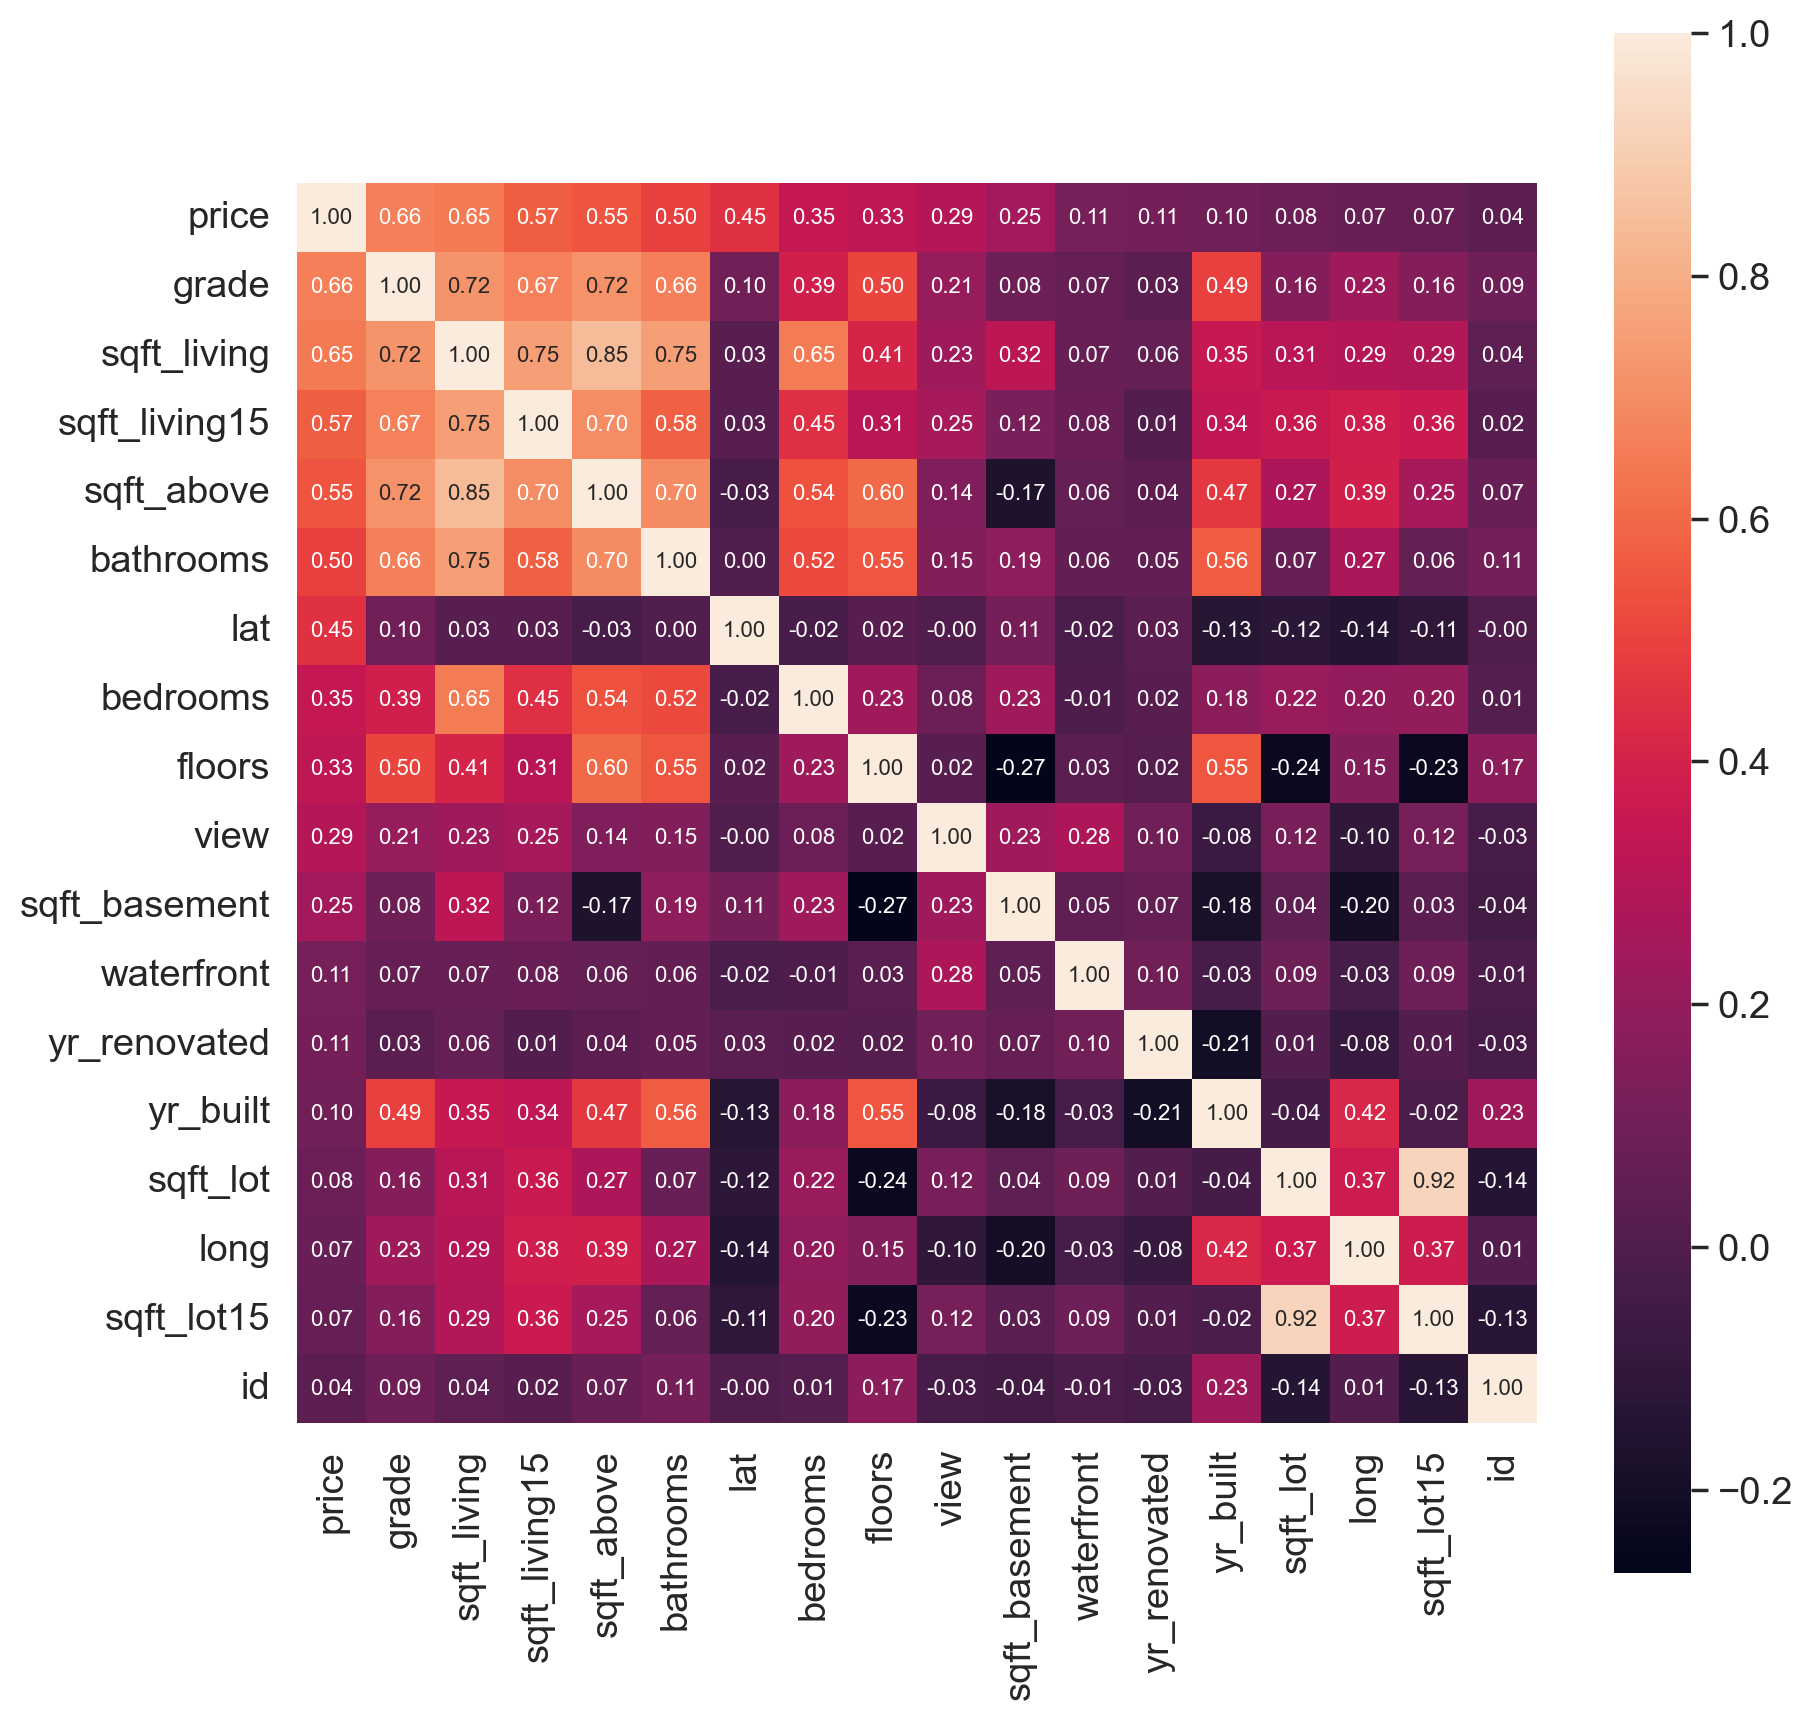

In [11]:
# Heatmap of the top 10 variables with high correlation.(correlation이 높은 상위 10개의 heatmap)
# continuous + sequential variables --> spearman
# The use of abs is to consider the inverse relationship as well.(abs는 반비례관계도 고려하기 위함)

import scipy as sp

cor_abs = abs(data.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=18, columns='price').index # price과 correlation이 높은 column 10개 뽑기(내림차순)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(data[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

- The data that has a high correlation coefficient with the target variable 'price' includes 'grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'bedrooms', 'floors', and 'view'.  
    (target data인 price와 상관계수가 높은 data는 'grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms',  'lat', 'bedrooms', 'floors', 'view'로 꼽혔다.)
- Most of the data that has a high correlation with the target variable 'price' are related to the area and size, while other factors include 'lat' which represents latitude and 'view' which refers to the exterior of the house.  
    (대부분 면적과 크기와 관련된 데이터들이고, 그외 다른 요소들은 lat은 위도, view는 집의 외관을 뜻한다.)

- Initially, I calculated the correlation coefficients for only the top 10 variables, but I realized that some important factors, such as renovation or reconstruction status and waterfront property, were missing. Therefore, I decided to examine the correlation coefficients for all variables again. The top 10 variables had correlation coefficients above 0.2, indicating a significant correlation. However, the remaining variables had coefficients around 0.1, which made me question their significance as meaningful data. It's worth noting that the correlation coefficient for the arbitrarily assigned ID variable is 0.04.  
    (처음에는 상관계수를 10개까지만 구했는데, 리노베이션이나 재건축 여부, 워터프런트 등 영향이 크게 있을 것 같은 요소가 빠져서 다시 모든 요소에 대해 상관계수를 따져보았다. 상위 10개는 상관계수가 0.2 이상으로 상관관계를 어느정도 확인 할수 있었지만 그 나머지는 0.1사이여서 데이터로써 의미를 가질 수 있을지 의문을 같게 되었다. 참고로 아무 이유없이 순서대로 메긴id의 상관계수가 0.04이다.)

In [12]:
data['waterfront'].unique()

array([0, 1], dtype=int64)

In [13]:
data['yr_renovated'].unique()

array([   0, 2002, 1999, 1991, 1978, 2005, 2008, 2003, 1994, 1984, 1954,
       2014, 2011, 1974, 1983, 2013, 1990, 1957, 1977, 1981, 1995, 2000,
       1986, 1992, 2004, 2007, 1987, 2006, 1985, 1971, 1945, 1979, 1997,
       2010, 1969, 1948, 2009, 1970, 2015, 1989, 2001, 1968, 2012, 1963,
       1993, 1962, 1972, 1980, 1998, 1955, 1996, 1950, 1956, 1982, 1988,
       1940, 1946, 1975, 1964, 1958, 1976, 1973, 1967, 1965, 1944],
      dtype=int64)

In [14]:
data[data['yr_renovated'] == 0]

id             date      price  bedrooms  bathrooms  sqft_living  \
0          0  20141013T000000   221900.0         3       1.00         1180   
1          1  20150225T000000   180000.0         2       1.00          770   
2          2  20150218T000000   510000.0         3       2.00         1680   
3          3  20140627T000000   257500.0         3       2.25         1715   
4          4  20150115T000000   291850.0         3       1.50         1060   
...      ...              ...        ...       ...        ...          ...   
15030  15030  20141014T000000   610685.0         4       2.50         2520   
15031  15031  20150326T000000  1007500.0         4       3.50         3510   
15032  15032  20140521T000000   360000.0         3       2.50         1530   
15033  15033  20150223T000000   400000.0         4       2.50         2310   
15034  15034  20141015T000000   325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0           0     0  ...      7        1180   
1         10000     1.0           0     0  ...      6         770   
2          8080     1.0           0     0  ...      8        1680   
3          6819     2.0           0     0  ...      7        1715   
4          9711     1.0           0     0  ...      7        1060   
...         ...     ...         ...   ...  ...    ...         ...   
15030      6023     2.0           0     0  ...      9        2520   
15031      7200     2.0           0     0  ...      9        2600   
15032      1131     3.0           0     0  ...      8        1530   
15033      5813     2.0           0     0  ...      8        2310   
15034      1076     2.0           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                  0      1933             0    98028  47.7379 -122.233   
2                  0      1987             0    98074  47.6168 -122.045   
3                  0      1995             0    98003  47.3097 -122.327   
4                  0      1963             0    98198  47.4095 -122.315   
...              ...       ...           ...      ...      ...      ...   
15030              0      2014             0    98056  47.5137 -122.167   
15031            910      2009             0    98136  47.5537 -122.398   
15032              0      2009             0    98103  47.6993 -122.346   
15033              0      2014             0    98146  47.5107 -122.362   
15034              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               2720        8062  
2               1800        7503  
3               2238        6819  
4               1650        9711  
...              ...         ...  
15030           2520        6023  
15031           2050        6200  
15032           1530        1509  
15033           1830        7200  
15034           1020        1357  

[14404 rows x 21 columns]

## 3. Data preprocessing(데이터 전처리)
----
1. I plan to normalize the variable "price" using the logarithm function to address the large standard deviation.  
    (일단 표준편차가 크게 나온 price를 로그 함수를 이용해서 정규화 시도할 예정이다.)
2. I will apply the standard data preprocessing techniques used in the LMS for the remaining variables.  
    (이외 데이터는 LMS에 시도한 데이터 전처리를 기본으로 데이터 전처리를 시도한다.)

In [15]:
target_data= data['price']
data_copy = data.copy()

- 데이터 백을 위해 data_copy에 data를 복사해둔다. 

In [16]:
print(data.shape)
print(data_copy.shape)

(15035, 21)
(15035, 21)


In [17]:
del data['price']

- train_data와 target data를 합쳐서 같은 프로세스로 정규화를 시도한다. 

In [18]:
train_len = len(data)
data = pd.concat((data, test_data), axis=0)

print(len(data))

21503


In [19]:
train_len

15035

<AxesSubplot:>

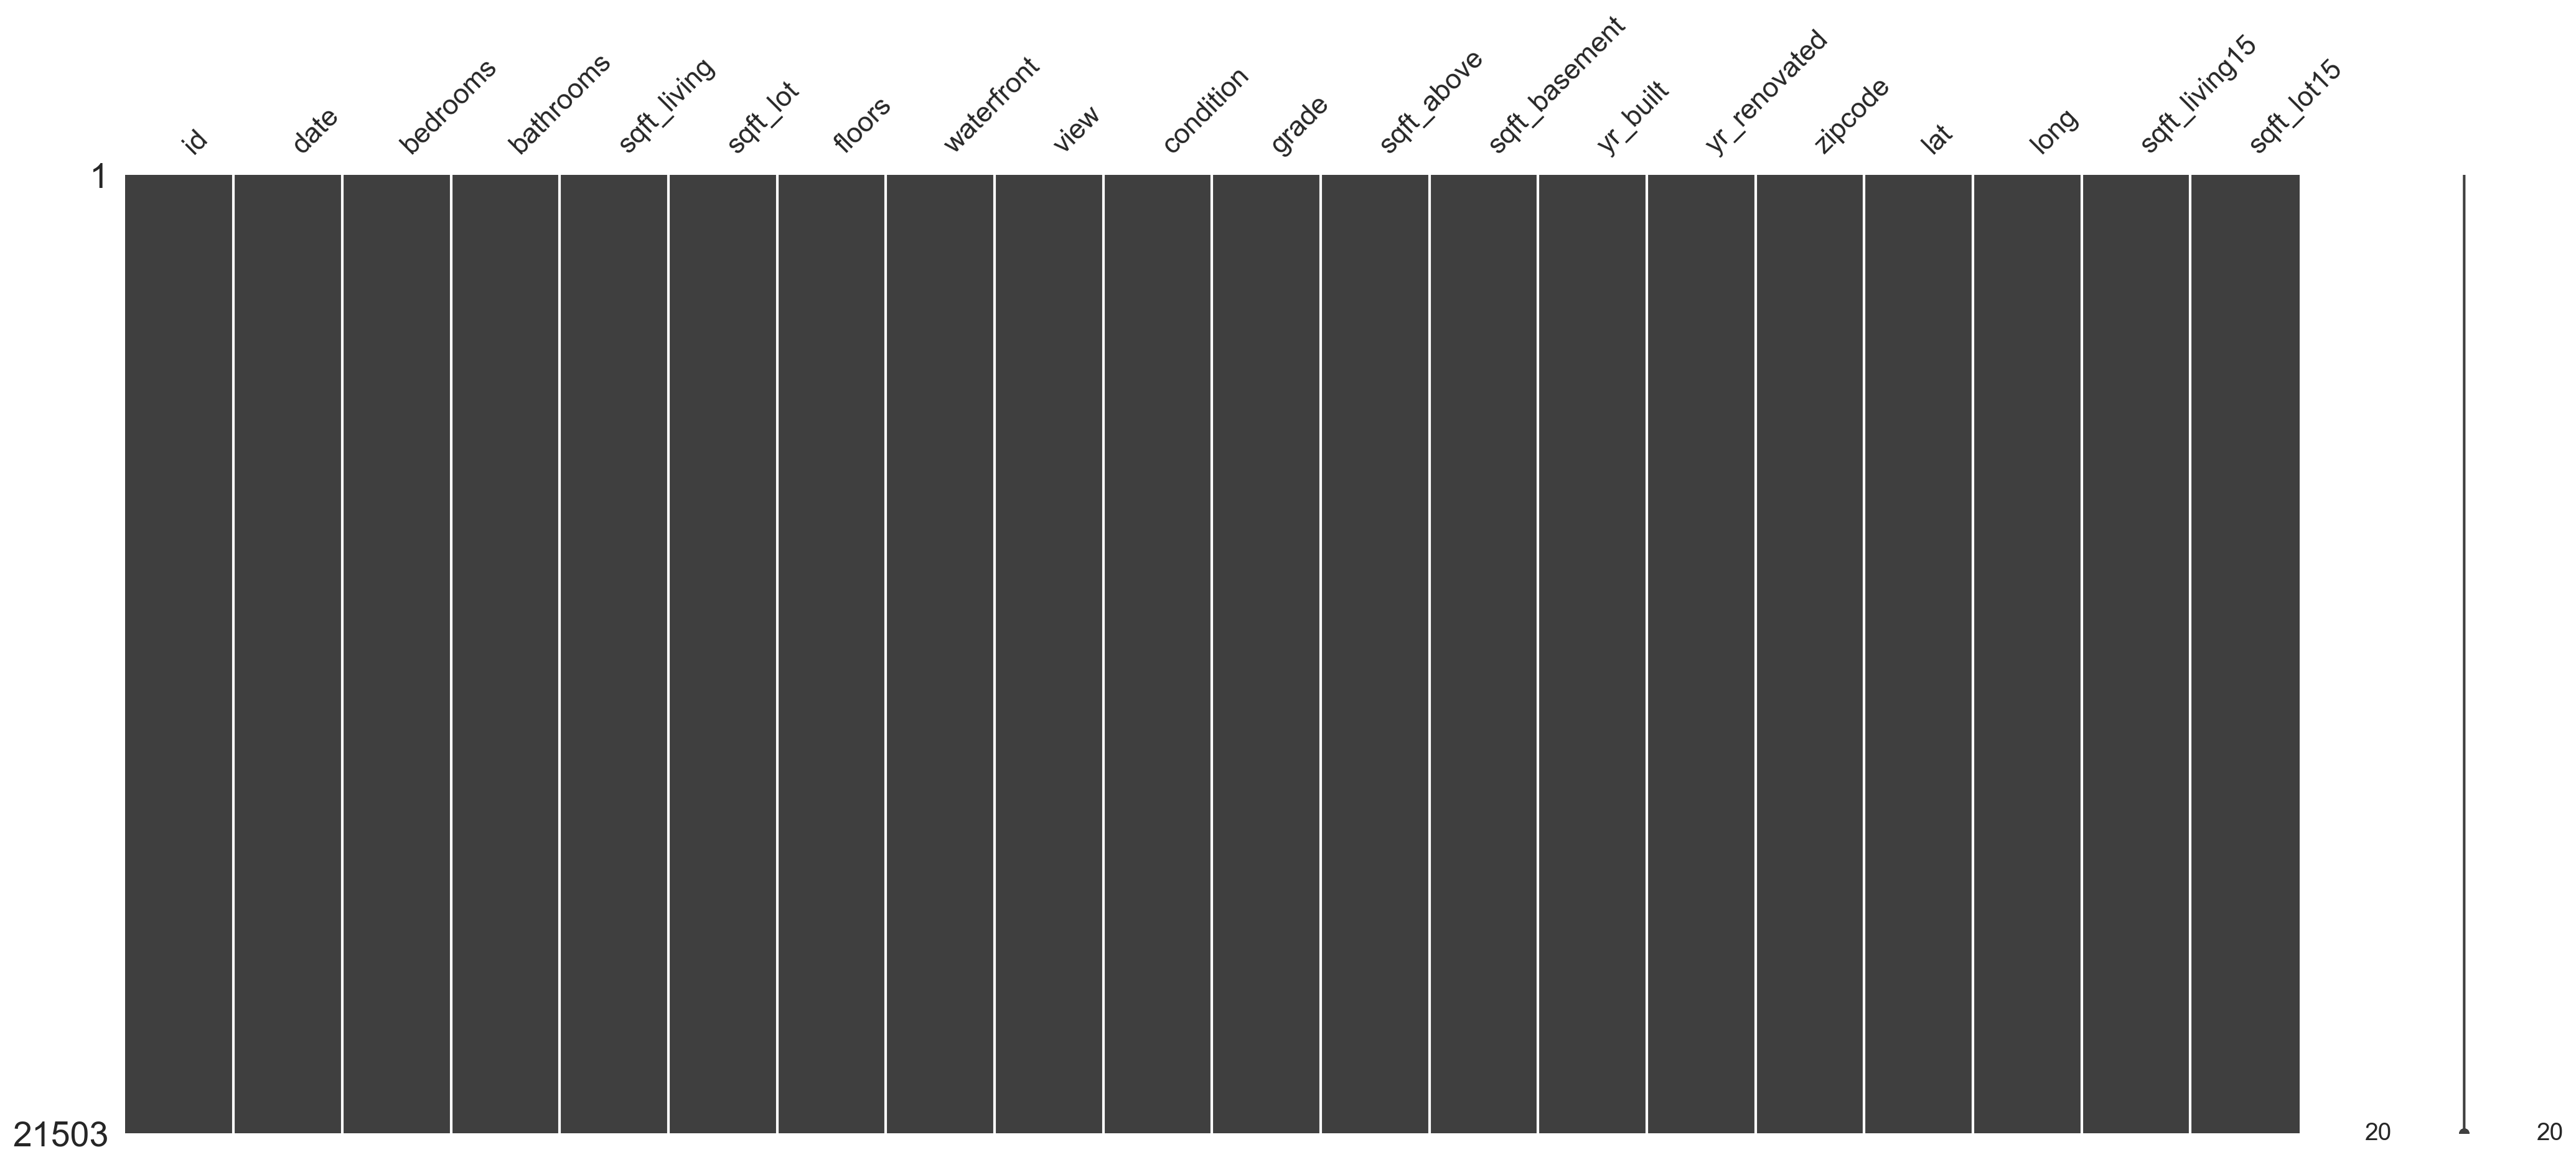

In [20]:
#결측치 확인
msno.matrix(data)

In [21]:
#결측치 확인
print(data.isnull().sum())

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [22]:
test_id = data['id'][train_len:]
del data['id']

In [23]:
test_id

0       15035
1       15036
2       15037
3       15038
4       15039
        ...  
6463    21498
6464    21499
6465    21500
6466    21501
6467    21502
Name: id, Length: 6468, dtype: int64

In [24]:
data['date'] = data['date'].apply(lambda x: x[:6]).astype(int)

data.head(10)

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410         3       1.00         1180      5650     1.0           0   
1  201502         2       1.00          770     10000     1.0           0   
2  201502         3       2.00         1680      8080     1.0           0   
3  201406         3       2.25         1715      6819     2.0           0   
4  201501         3       1.50         1060      9711     1.0           0   
5  201504         3       2.50         3560      9796     1.0           0   
6  201405         2       1.00         1160      6000     1.0           0   
7  201405         3       1.00         1430     19901     1.5           0   
8  201410         3       1.75         1370      9680     1.0           0   
9  201503         5       2.00         1810      4850     1.5           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      6         770              0      1933             0   
2     0          3      8        1680              0      1987             0   
3     0          3      7        1715              0      1995             0   
4     0          3      7        1060              0      1963             0   
5     0          3      8        1860           1700      1965             0   
6     0          4      7         860            300      1942             0   
7     0          4      7        1430              0      1927             0   
8     0          4      7        1370              0      1977             0   
9     0          3      7        1810              0      1900             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98028  47.7379 -122.233           2720        8062  
2    98074  47.6168 -122.045           1800        7503  
3    98003  47.3097 -122.327           2238        6819  
4    98198  47.4095 -122.315           1650        9711  
5    98007  47.6007 -122.145           2210        8925  
6    98115  47.6900 -122.292           1330        6000  
7    98028  47.7558 -122.229           1780       12697  
8    98074  47.6127 -122.045           1370       10208  
9    98107  47.6700 -122.394           1360        4850

- After applying the normalization technique to the price data, let's visualize the graph.  
    (price 데이터 정규화 시도 후 그래프를 확인한다. )

C:\Users\aeoli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

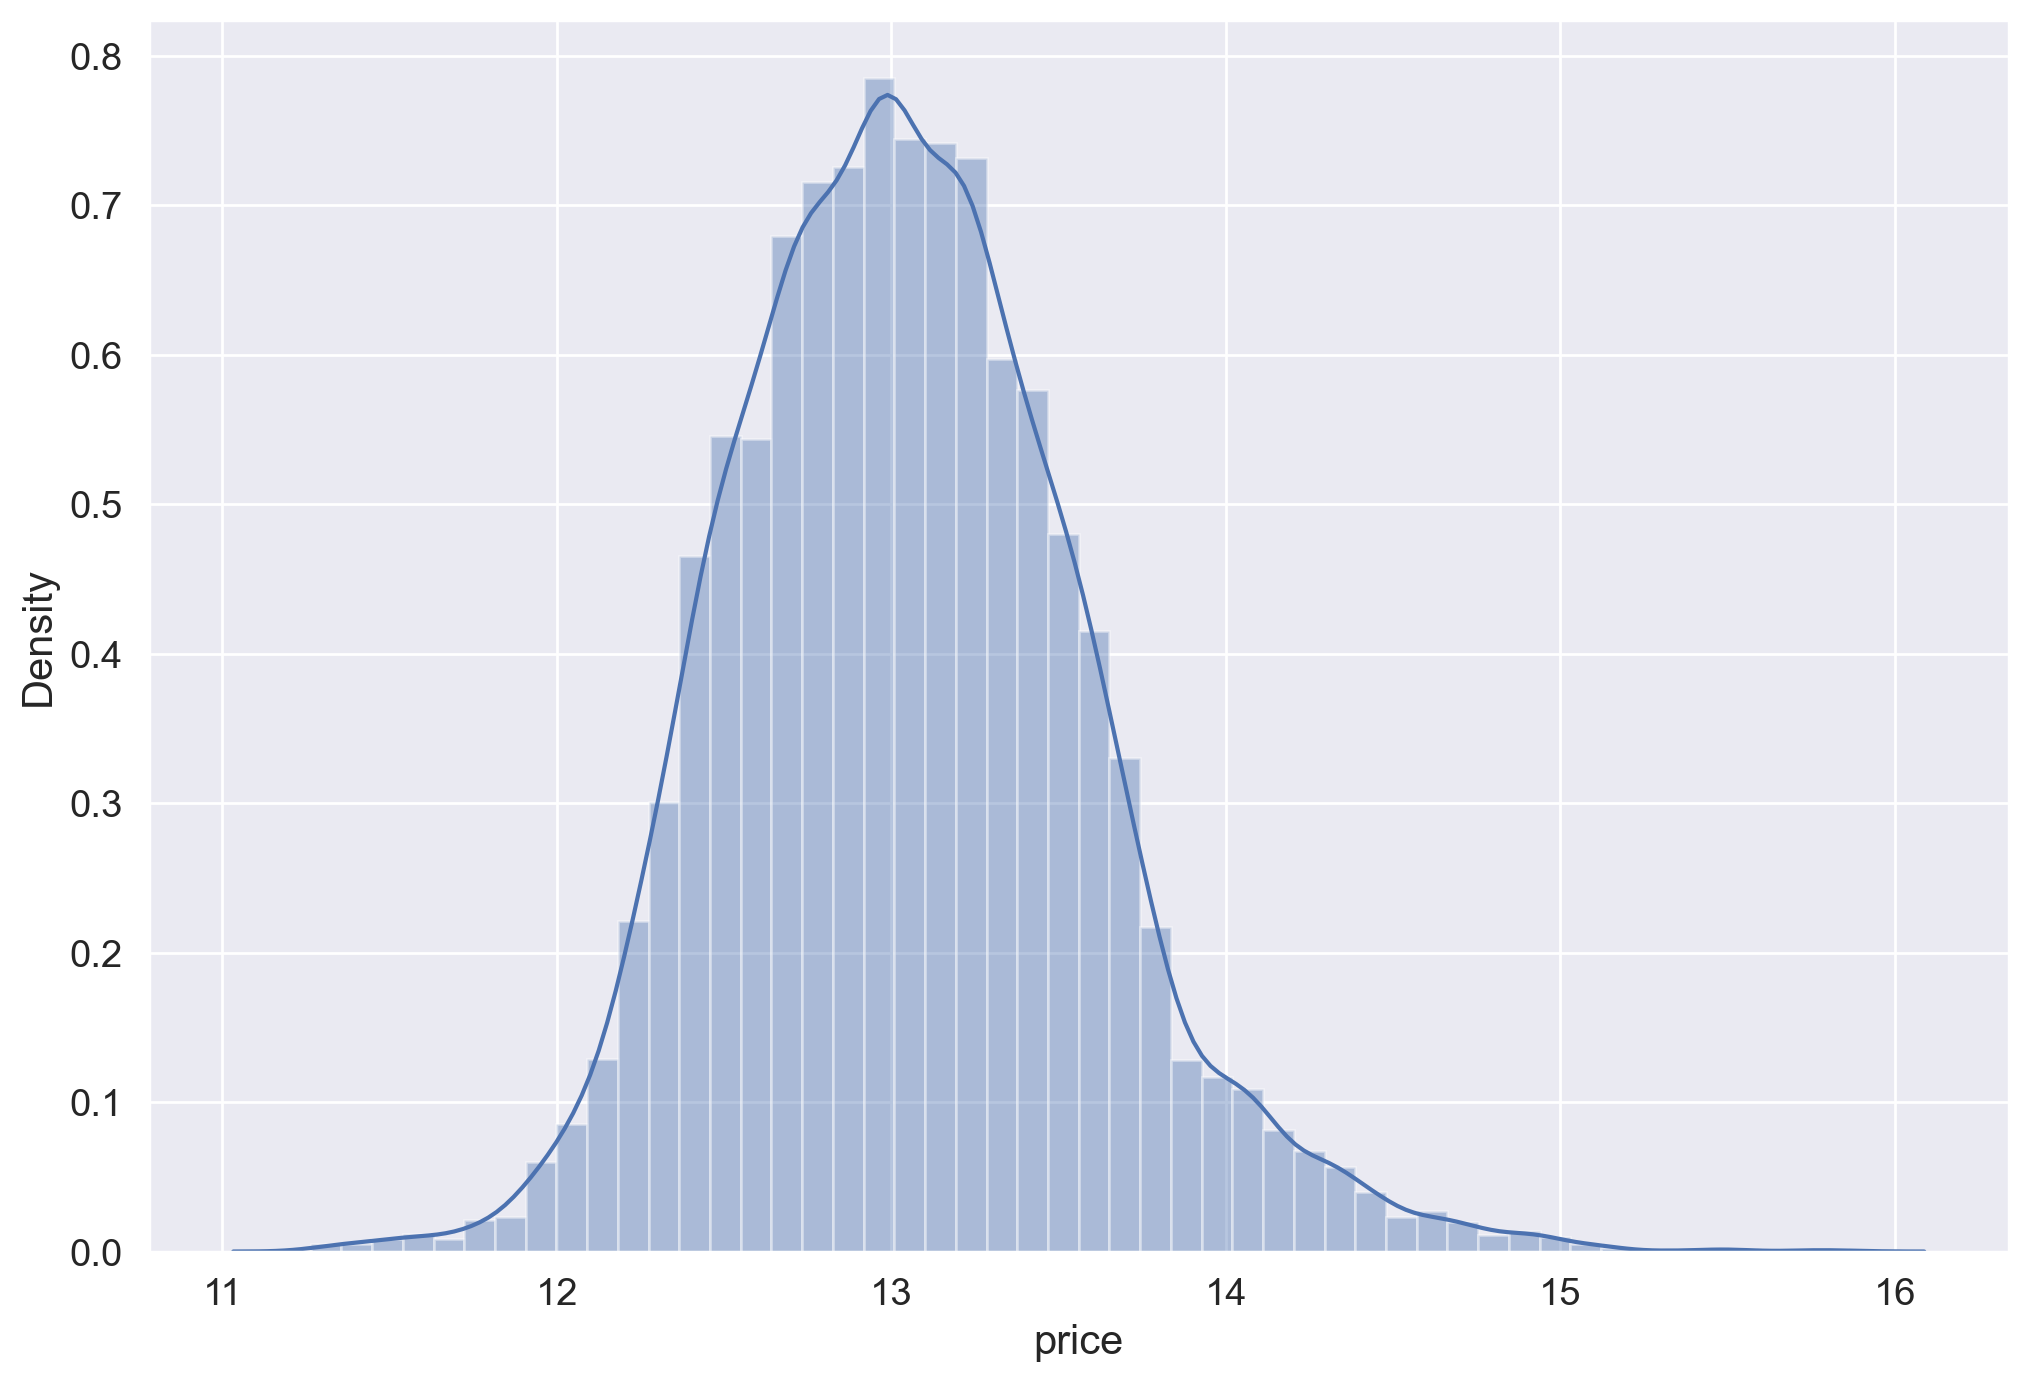

In [25]:
target_data = np.log1p(target_data)

f, ax = plt.subplots(figsize=(12, 8))
sns.distplot(target_data)

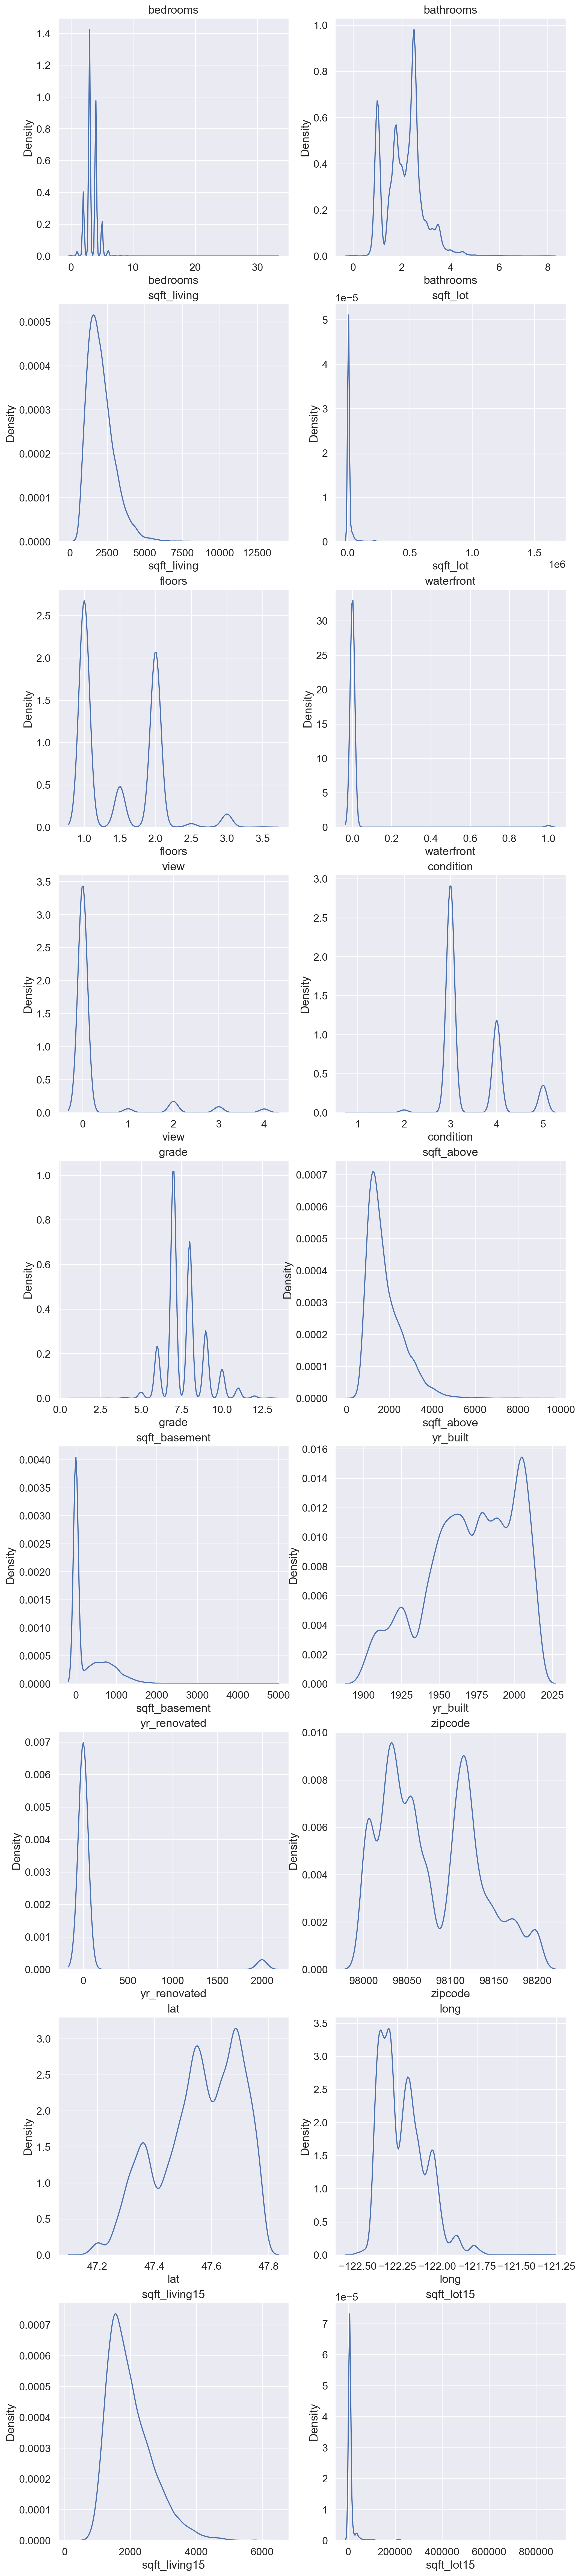

In [26]:
fig, ax = plt.subplots(9, 2, figsize=(12, 60))  # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# We will exclude the 'id' variable (cases where count == 0) and examine the distribution.(id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.)
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

In [27]:
# Normalization of skewed data after checking the distribution.(데이터 확인 후 한쪽으로 치우쳐져 있는 데이터 정규화)
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

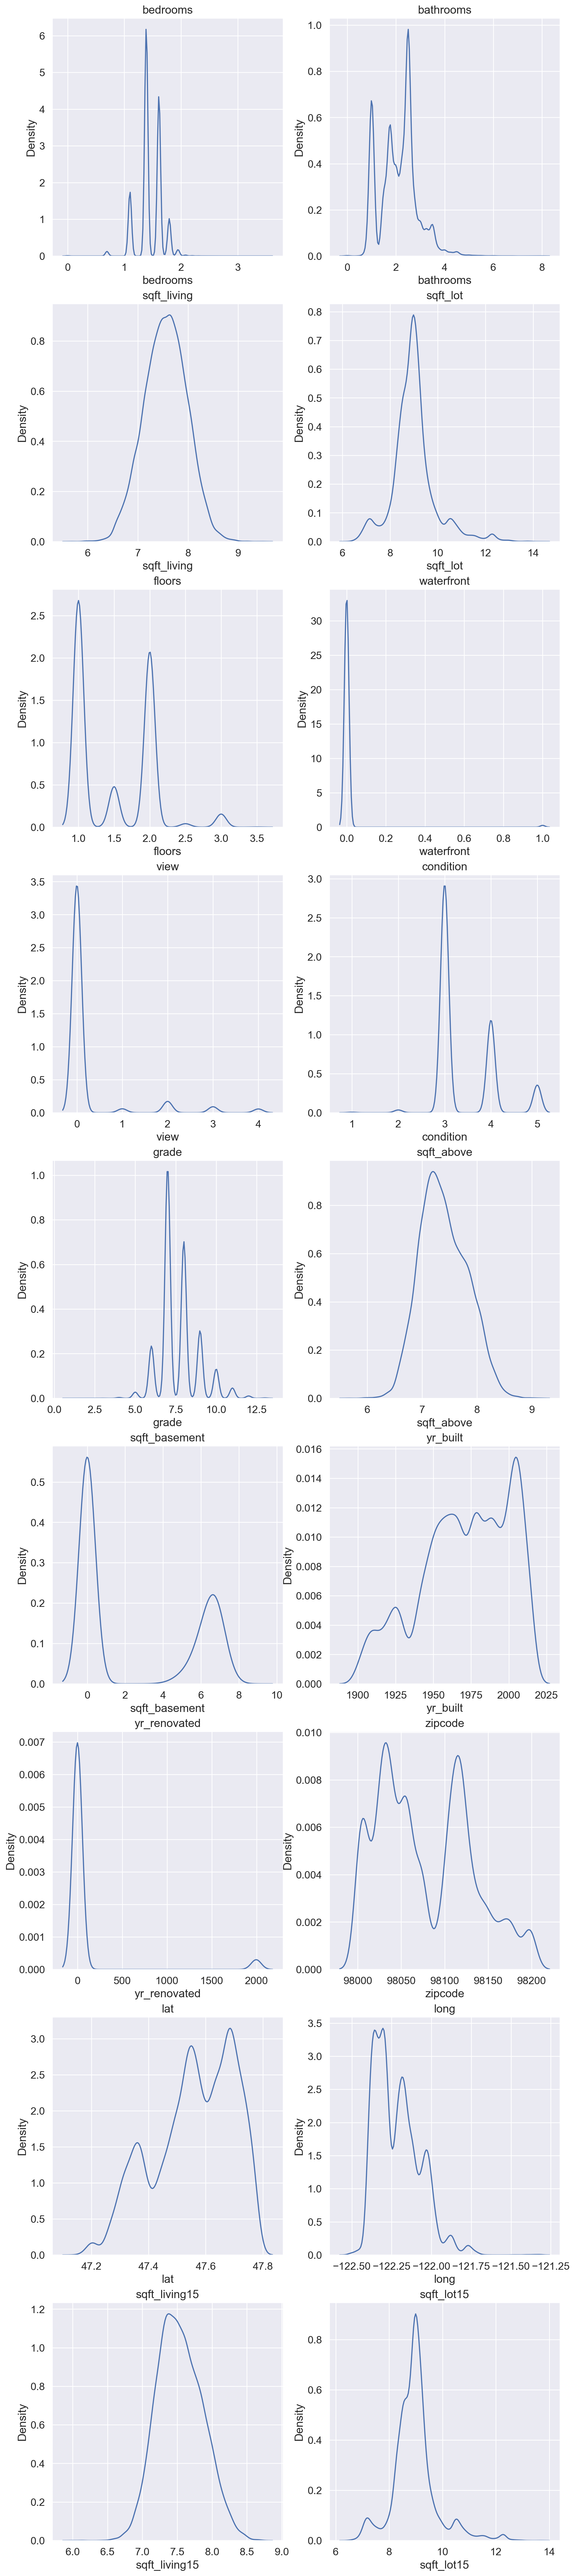

In [28]:
# Compare the entire data before and after normalization to observe the differences.(전체 데이터를 확인해서 정규화 전과 후를 비교해 본다.)
fig, ax = plt.subplots(9, 2, figsize=(12, 60))  

count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

- Since "waterfront" is a binary value represented as 0 and 1, the need for normalization is not necessary.  
    (waterfront는 불린값을 0과1로 수치화 한 것이기 때문에 정규화의 필요성이 떨어진다.)
- Indeed, the variable "yr_renovated" requires careful consideration as it represents whether a house has undergone renovation.  
    (다만 yr_renovated는 이노베이션을 하지 않은 집은 0으로 이노베이션을 한집은 그 연도을 기록했기 때문에 데이터를 어떻게 바라 볼지에 대해 고민이 필요하다.)

In [29]:
test_data = data.iloc[train_len:, :]
train_data = data.iloc[:train_len, :]

print(train_data.shape)
print(test_data.shape)

(15035, 19)
(6468, 19)


In [30]:
train_data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410  1.386294       1.00     7.074117  8.639588     1.0           0   
1  201502  1.098612       1.00     6.647688  9.210440     1.0           0   
2  201502  1.386294       2.00     7.427144  8.997271     1.0           0   
3  201406  1.386294       2.25     7.447751  8.827615     2.0           0   
4  201501  1.386294       1.50     6.966967  9.181118     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7    7.074117            0.0      1955             0   
1     0          3      6    6.647688            0.0      1933             0   
2     0          3      8    7.427144            0.0      1987             0   
3     0          3      7    7.447751            0.0      1995             0   
4     0          3      7    6.966967            0.0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257       7.201171    8.639588  
1    98028  47.7379 -122.233       7.908755    8.995041  
2    98074  47.6168 -122.045       7.496097    8.923191  
3    98003  47.3097 -122.327       7.713785    8.827615  
4    98198  47.4095 -122.315       7.409136    9.181118

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int32  
 1   bedrooms       15035 non-null  float64
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  float64
 4   sqft_lot       15035 non-null  float64
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  float64
 11  sqft_basement  15035 non-null  float64
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  float64
 18  sqft_l

In [32]:
test_data.head()

date  bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  \
0  201412  1.386294       2.25     7.852050   8.887791     2.0           0   
1  201412  1.609438       3.00     7.581210   8.517393     1.0           0   
2  201405  1.609438       4.50     8.598036  11.532051     1.0           0   
3  201504  1.386294       1.00     7.484930   8.918784     1.0           0   
4  201503  1.386294       2.50     7.544861   8.788898     2.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7    7.682943       5.993961      1951          1991   
1     0          5      7    6.957497       6.814543      1965             0   
2     0          3     11    8.266421       7.333676      2001             0   
3     0          3      7    6.957497       6.594413      1960             0   
4     0          3      7    7.544861       0.000000      2003             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98125  47.7210 -122.319       7.433075    8.941153  
1    98136  47.5208 -122.393       7.215975    8.517393  
2    98053  47.6561 -122.005       8.468213   11.532051  
3    98146  47.5123 -122.337       7.484930    9.001346  
4    98038  47.3684 -122.031       7.779467    8.932080

## 4. Model training(모델 훈련)

In [33]:
# Fixing random seed 랜덤계수 고정
RANDOM_STATE = 2022

gboost = GradientBoostingRegressor(random_state=RANDOM_STATE)
xgboost = xgb.XGBRegressor(random_state=RANDOM_STATE)
lightgbm = lgb.LGBMRegressor(random_state=RANDOM_STATE)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'}, {'model':lightgbm, 'name':'LightGBM'}]

In [34]:
# train_data, target_data, test_data
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(train_data.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=train_data.values, y=target_data, cv=kfold))
        print(f"Model: {m['name']}, CV score: {CV_score:.4f}")

In [35]:
get_cv_score(models)

Model: GradientBoosting, CV score: 0.8797
Model: XGBoost, CV score: 0.8960
Model: LightGBM, CV score: 0.9025


In [36]:
def AveragingBlending(models, train_data, target_data, test_data):
    for m in models:
        m['model'].fit(train_data.values, target_data)
        print(m['model'])
    predictions = np.column_stack([
        m['model'].predict(test_data.values) for m in models
    ])
    return np.mean(predictions, axis=1)

In [37]:
y_pred = AveragingBlending(models, train_data, target_data, test_data)
print(len(y_pred))
y_pred

GradientBoostingRegressor(random_state=2022)
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2022, ...)
LGBMRegressor(random_state=2022)
6468


array([13.15713339, 12.97115392, 14.0612934 , ..., 13.02628892,
       12.69094873, 12.99281384])

In [38]:
y_pred_tr = np.expm1(y_pred)
y_pred_tr

array([ 517689.77836914,  429832.80921747, 1278620.88666991, ...,
        454197.1869859 ,  324793.75297491,  439244.53342562])

In [39]:
result01 = pd.DataFrame({
    'id': test_id,
    'price': y_pred_tr
})

result01.head()

id         price
0  15035  5.176898e+05
1  15036  4.298328e+05
2  15037  1.278621e+06
3  15038  3.200576e+05
4  15039  3.207891e+05

In [40]:
my_submission_path = '.\\data\\aeolian83_submission_01.csv'
result01.to_csv(my_submission_path, index=False)

print(my_submission_path)

.\data\aeolian83_submission_01.csv


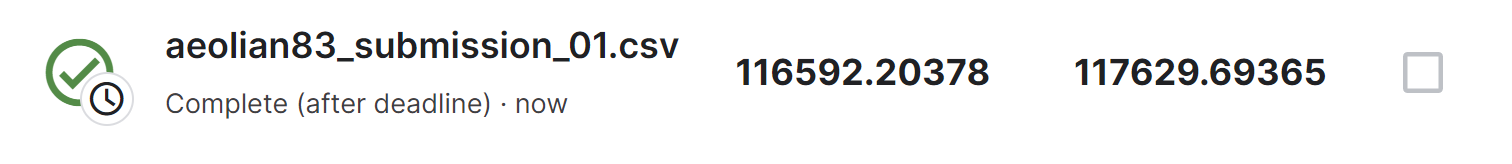

- 뭔가 좀더 적극적인 시도를 하지 않으면 목표한 점수에 도달할 것 같지 않다. 
    1. 데이터 전처리 과정에서 조금 고민했던 리노베이션 여부를 0과 1로 바꾼다. 
    2. 각 학습모델의 파라미터를 수정해본다. 
    3. 앙상블 모델에 들어가는 모델 숫자를 늘린다.
    4. 각 모델들이 같은 데이터를 가지고 학습하는데 각 모델별로 다른 데이터를 넣도록 시도해본다. 

- First, let's create an evaluation function for the experiments.(먼저 실험을 위해 평가 도구를 함수로 만든다.)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [42]:
def rmse(target_data, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(target_data), np.expm1(y_pred)))

In [43]:
#학습 모델 model import
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [44]:
gboost = GradientBoostingRegressor(random_state=RANDOM_STATE)
xgboost = XGBRegressor(random_state=RANDOM_STATE)
lightgbm = LGBMRegressor(random_state=RANDOM_STATE)
rdforest = RandomForestRegressor(random_state=RANDOM_STATE)

models = [gboost, xgboost, lightgbm, rdforest]

In [45]:
def get_scores(models, train_data, target_data):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train_data, target_data, random_state=RANDOM_STATE, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

get_scores(models, train_data, target_data)

RMSE
RandomForestRegressor      136463.501115
GradientBoostingRegressor  130363.559558
XGBRegressor               126719.521269
LGBMRegressor              120307.155358

- 데이터 전처리 후 결과를 확인한다

In [46]:
data

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     201410  1.386294       1.00     7.074117  8.639588     1.0           0   
1     201502  1.098612       1.00     6.647688  9.210440     1.0           0   
2     201502  1.386294       2.00     7.427144  8.997271     1.0           0   
3     201406  1.386294       2.25     7.447751  8.827615     2.0           0   
4     201501  1.386294       1.50     6.966967  9.181118     1.0           0   
...      ...       ...        ...          ...       ...     ...         ...   
6463  201406  1.386294       1.75     7.313887  9.390075     1.0           0   
6464  201501  1.386294       2.00     7.307202  7.027315     3.0           0   
6465  201502  1.386294       2.50     7.178545  7.166266     2.0           0   
6466  201406  1.098612       0.75     6.928538  7.208600     2.0           0   
6467  201501  1.386294       2.50     7.378384  7.778630     2.0           0   

      view  condition  grade  sqft_above  sqft_basement  yr_built  \
0        0          3      7    7.074117       0.000000      1955   
1        0          3      6    6.647688       0.000000      1933   
2        0          3      8    7.427144       0.000000      1987   
3        0          3      7    7.447751       0.000000      1995   
4        0          3      7    6.966967       0.000000      1963   
...    ...        ...    ...         ...            ...       ...   
6463     0          3      6    7.313887       0.000000      2014   
6464     0          3      8    7.307202       0.000000      2014   
6465     0          3      8    7.074117       4.875197      2008   
6466     0          3      7    6.928538       0.000000      2009   
6467     0          3      8    7.378384       0.000000      2004   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0                0    98178  47.5112 -122.257       7.201171    8.639588  
1                0    98028  47.7379 -122.233       7.908755    8.995041  
2                0    98074  47.6168 -122.045       7.496097    8.923191  
3                0    98003  47.3097 -122.327       7.713785    8.827615  
4                0    98198  47.4095 -122.315       7.409136    9.181118  
...            ...      ...      ...      ...            ...         ...  
6463             0    98010  47.3095 -122.002       7.186144    9.332912  
6464             0    98144  47.5699 -122.288       7.244942    7.115582  
6465             0    98116  47.5773 -122.409       7.193686    7.143618  
6466             0    98144  47.5944 -122.299       6.928538    7.604894  
6467             0    98027  47.5345 -122.069       7.252054    7.160846  

[21503 rows x 19 columns]

In [47]:
data_copy01 = data.copy()

In [48]:
data['yr_renovated'] = data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [49]:
data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410  1.386294       1.00     7.074117  8.639588     1.0           0   
1  201502  1.098612       1.00     6.647688  9.210440     1.0           0   
2  201502  1.386294       2.00     7.427144  8.997271     1.0           0   
3  201406  1.386294       2.25     7.447751  8.827615     2.0           0   
4  201501  1.386294       1.50     6.966967  9.181118     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7    7.074117            0.0      1955             0   
1     0          3      6    6.647688            0.0      1933             0   
2     0          3      8    7.427144            0.0      1987             0   
3     0          3      7    7.447751            0.0      1995             0   
4     0          3      7    6.966967            0.0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257       7.201171    8.639588  
1    98028  47.7379 -122.233       7.908755    8.995041  
2    98074  47.6168 -122.045       7.496097    8.923191  
3    98003  47.3097 -122.327       7.713785    8.827615  
4    98198  47.4095 -122.315       7.409136    9.181118

In [50]:
test_data = data.iloc[train_len:, :]
train_data = data.iloc[:train_len, :]

print(train_data.shape)
print(test_data.shape)

(15035, 19)
(6468, 19)


In [51]:
get_scores(models, train_data, target_data)

RMSE
RandomForestRegressor      135617.672991
GradientBoostingRegressor  129218.863408
XGBRegressor               127403.605425
LGBMRegressor              121752.541254

- 재미있게도 특정모델은 떨어졌고, 특정모델을 손실값이 올랐다
- 이제 파라미터 커스텀을 해본다

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # Initialize the GridSearchCV model.(GridSearchCV 모델로 초기화)
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [54]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 15],
    'learning_rate': [0.1, 0.01, 0.001]
}
model = LGBMRegressor(random_state=RANDOM_STATE)

In [55]:
my_GridSearch(model, train_data, target_data, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


learning_rate  max_depth  n_estimators     score     RMSLE
3           0.100         15           100 -0.027149  0.164768
2           0.100         15            50 -0.029277  0.171106
1           0.100          3           100 -0.033484  0.182986
0           0.100          3            50 -0.039821  0.199552
7           0.010         15           100 -0.081080  0.284745
5           0.010          3           100 -0.102410  0.320015
6           0.010         15            50 -0.138643  0.372348
4           0.010          3            50 -0.156118  0.395117
11          0.001         15           100 -0.239401  0.489286
9           0.001          3           100 -0.244878  0.494852
10          0.001         15            50 -0.258047  0.507983
8           0.001          3            50 -0.260888  0.510772

In [56]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10]
}

my_GridSearch(model, train_data, target_data, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


max_depth  n_estimators     score     RMSLE
3         10           100 -0.027102  0.164628
2         10            50 -0.029343  0.171297
1          1           100 -0.055002  0.234526
0          1            50 -0.073398  0.270920

In [57]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [1, 10]
}

my_GridSearch(model, train_data, target_data, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


max_depth  n_estimators     score     RMSLE
3         10           200 -0.026353  0.162336
2         10           100 -0.027102  0.164628
1          1           200 -0.045211  0.212628
0          1           100 -0.055002  0.234526

In [58]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
    'num_iterations': [1000, 10000]
}

my_GridSearch(model, train_data, target_data, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\aeoli\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


max_depth  n_estimators  num_iterations     score     RMSLE
4         10            50            1000 -0.026729  0.163489
6         10           100            1000 -0.026729  0.163489
5         10            50           10000 -0.027797  0.166724
7         10           100           10000 -0.027797  0.166724
1          1            50           10000 -0.030303  0.174079
3          1           100           10000 -0.030303  0.174079
0          1            50            1000 -0.036573  0.191240
2          1           100            1000 -0.036573  0.191240

In [59]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
    'boosting_type': ['gbdt', 'dart', 'goss']
}

my_GridSearch(model, train_data, target_data, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


boosting_type  max_depth  n_estimators     score     RMSLE
3           gbdt         10           100 -0.027102  0.164628
11          goss         10           100 -0.027491  0.165803
2           gbdt         10            50 -0.029343  0.171297
10          goss         10            50 -0.029459  0.171637
9           goss          1           100 -0.053815  0.231981
1           gbdt          1           100 -0.055002  0.234526
8           goss          1            50 -0.071974  0.268280
0           gbdt          1            50 -0.073398  0.270920
7           dart         10           100 -1.471260  1.212955
5           dart          1           100 -1.521139  1.233345
6           dart         10            50 -8.887974  2.981270
4           dart          1            50 -8.951328  2.991877

In [60]:
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [1, 10],
    'boosting_type': ['dart', 'goss']
}

my_GridSearch(model, train_data, target_data, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


boosting_type  max_depth  n_estimators     score     RMSLE
7          goss         10           150 -0.027236  0.165032
6          goss         10           100 -0.027491  0.165803
5          goss          1           150 -0.047316  0.217522
4          goss          1           100 -0.053815  0.231981
3          dart         10           150 -0.256113  0.506076
1          dart          1           150 -0.299335  0.547115
2          dart         10           100 -1.471260  1.212955
0          dart          1           100 -1.521139  1.233345

In [61]:
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.03]
}

my_GridSearch(model, train_data, target_data, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


learning_rate  n_estimators     score     RMSLE
1           0.10           150 -0.026545  0.162928
0           0.10           100 -0.027087  0.164581
3           0.03           150 -0.029696  0.172326
2           0.03           100 -0.034094  0.184644

In [62]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

my_GridSearch(model, train_data, target_data, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


max_depth  n_estimators     score     RMSLE
3         20           200 -0.026348  0.162322
1         10           200 -0.026353  0.162336
2         20           100 -0.027075  0.164544
0         10           100 -0.027102  0.164628

In [63]:
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [20, 25]
}

my_GridSearch(model, train_data, target_data, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


max_depth  n_estimators     score     RMSLE
1         20           300 -0.026301  0.162176
3         25           300 -0.026315  0.162220
0         20           200 -0.026348  0.162322
2         25           200 -0.026351  0.162329

In [64]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20]
}

my_GridSearch(model, train_data, target_data, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


max_depth  n_estimators     score     RMSLE
1         20           300 -0.026301  0.162176
0         20           200 -0.026348  0.162322
2         20           400 -0.026349  0.162325

In [65]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20],
    'learning_rate': [0.1, 0.3]
}

my_GridSearch(model, train_data, target_data, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


learning_rate  max_depth  n_estimators     score     RMSLE
1            0.1         20           300 -0.026301  0.162176
0            0.1         20           200 -0.026348  0.162322
2            0.1         20           400 -0.026349  0.162325
3            0.3         20           200 -0.028999  0.170291
4            0.3         20           300 -0.029421  0.171524
5            0.3         20           400 -0.029740  0.172453

In [66]:
param_grid = {
    'n_estimators': [300],
    'max_depth': [20],
    'learning_rate': [0.1, 0.001]
}

my_GridSearch(model, train_data, target_data, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


learning_rate  max_depth  n_estimators     score     RMSLE
0          0.100         20           300 -0.026301  0.162176
1          0.001         20           300 -0.180253  0.424562

In [67]:
param_grid = {
    'n_estimators': [300],
    'max_depth': [20],
    'learning_rate': [0.1, 0.001],
    'num_iterations': [100, 1000, 10000]
}

my_GridSearch(model, train_data, target_data, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\aeoli\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


learning_rate  max_depth  n_estimators  num_iterations     score     RMSLE
5          0.001         20           300           10000 -0.026696  0.163390
1          0.100         20           300            1000 -0.026924  0.164084
0          0.100         20           300             100 -0.027075  0.164544
2          0.100         20           300           10000 -0.027917  0.167084
4          0.001         20           300            1000 -0.081378  0.285269
3          0.001         20           300             100 -0.239401  0.489286

In [68]:
model_result = LGBMRegressor(max_depth=20, n_estimators=300, random_state=RANDOM_STATE)

In [69]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    submission_path = submission_path = '.\\data\\sample_submission.csv'
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '.\\data\\submission_{}_RMSLE_{}.csv'.format(model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [70]:
save_submission(model_result, train_data, target_data, test_data, 'lgbm', rmsle='0.162176')

.\data\submission_lgbm_RMSLE_0.162176.csv saved!


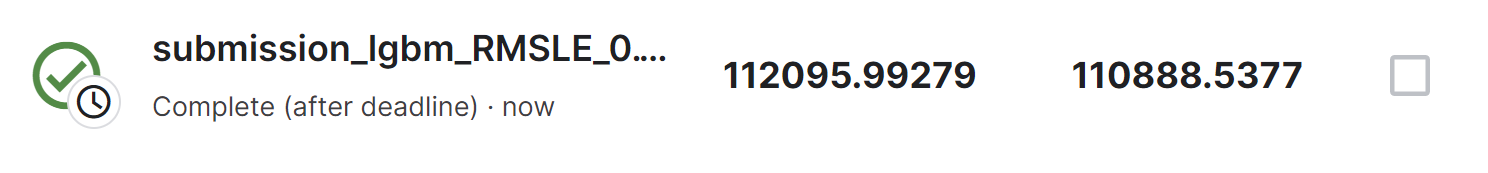

# Reflection(회고)

### Points I paid attention to(신경쓴 점)
- I have attempted various data analysis and preprocessing techniques.(좀더 다양한 데이터 분석 및 전처리를 시도했다.)
- I have attempted various hyperparameter tuning techniques.(다양한 하이퍼파라미터 튜닝을 시도했다.)

### Weak points(아쉬운점)
- I did not achieve the target score.(목표점수에 도달하지 못했다.)
- I couldn't fine-tune the hyperparameters further.(하이퍼 파라미터를 더 갈고 닦지 못했다.)
- I wasn't able to attempt ensemble prediction by fine-tuning the hyperparameters of various models.(다양한 모델의 하이퍼 파라미터를 갈고 닦아서 앙상블 예측을 시도하지 못했다.)

### Points for improvement(개선하고 싶은 점)
- I want to try ensemble prediction properly.(앙상블 예측을 제대로 시도해보고 싶다.)